# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



In [36]:
import pandas as pd 
import seaborn as sns
import plotly.express as px
import numpy as np

In [84]:

df = pd.read_csv('/Users/selahmitchell/Desktop/DS interactive app/plotly-dash/DSML/MLlabs/cars_hw.csv') # Load the data
df0 = df
df.head()


,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


<Axes: >

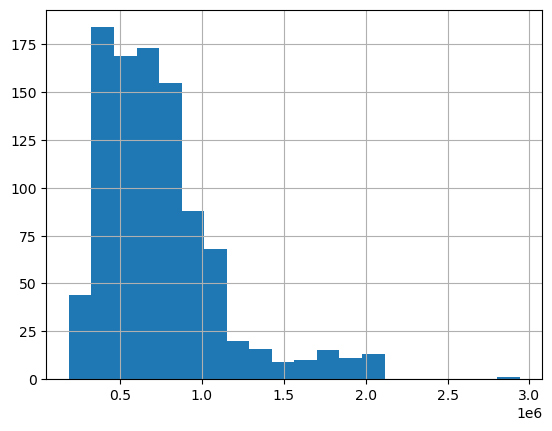

In [85]:

df['Price'].hist(bins=20)

<Axes: >

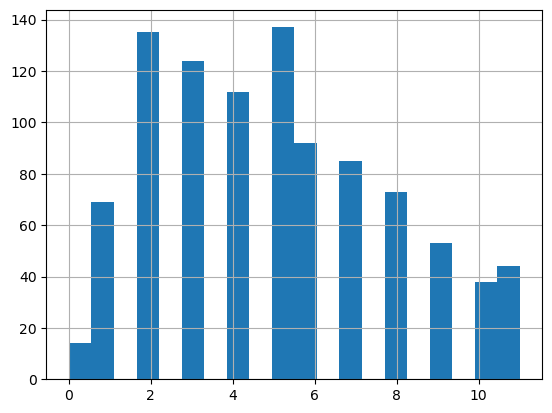

In [92]:
df['age'] = max(df['Make_Year'])-df['Make_Year'] # Convert year to age
df['age'].hist(bins=20)

<Axes: xlabel='age', ylabel='Price'>

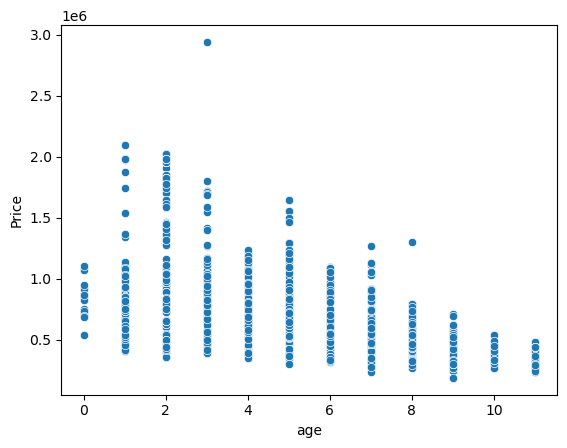

In [89]:
sns.scatterplot(data=df,y='Price',x='age')

In [93]:
import plotly.express as px

# Box plot
fig_box = px.box(df, x='Body_Type', y='Price', 
                 title='Box Plot of Vehicle Price by Body Type',
                 labels={'Body_Type': 'Body Type', 'Price': 'Price'},
                 color='Body_Type')
fig_box.update_layout(xaxis_title='Body Type', yaxis_title='Price')
fig_box.show()


In [94]:
# Scatter plot
fig_scatter = px.scatter(df, x='Mileage_Run', y='Price', 
                         color='Fuel_Type', 
                         title='Scatter Plot of Mileage vs. Price by Fuel Type',
                         labels={'Mileage_Run': 'Mileage (in km)', 'Price': 'Price'},
                         hover_data=['Make', 'Make_Year'])
fig_scatter.update_layout(xaxis_title='Mileage (in km)', yaxis_title='Price')
fig_scatter.show()

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
df['price_ihs'] = np.arcsinh(df['price'])
df['age_ihs'] = np.arcsinh(df['age'])
sns.scatterplot(data=df,y='price_ihs',x='age_ihs')

In [96]:
y = df['Price']
X = pd.get_dummies(df['Body_Type'], dtype='int')

from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=False).fit(X,y) # Run regression

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients

results

,variable,coefficient
0,crossover,7.050952e+05
1,hatchback,5.339773e+05
2,muv,6.264211e+05
3,sedan,8.097841e+05
4,suv,1.176495e+06


In [ ]:
# The sum of the squares of the red lines is the SSE:
np.random.seed(500) # Set the seed for the random number generator
N = 30
x = 5 + 2*np.random.normal(0,1,size = N) # Create an x
eps = np.random.normal(0,3,size = N) # Create noise
b0 = -1 # Intercept coefficoent
b1 = 3 # Slope coefficient
y = b0 + b1*x + eps
reg = slr(x,y) # Run the regression
for i in range(len(x)):
    plt.vlines(x[i], y[i], reg['y_hat'][i], color='r') # Visualize residuals
plt.plot(x,reg['y_hat'],label='Regression Line')
plt.scatter(x,y,label='Data')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='lower right')
plt.title('Visualizing SSE: Sum of Squared Red Lines')
plt.show()